# About Dataset

1. `id`: A unique identifier for each track.
2. `name`: The name of the track.
3. `album`: The name of the album to which the track belongs.
4. `album_id`: An identifier for the album.
5. `artists`: The name of the artist(s) who performed the track.
6. `artist_ids`: Identifier(s) for the artist(s).
7. `track_number`: The position of the track within the album.
8. `disc_number`: The disc number (if it's a multi-disc album).
9. `explicit`: A boolean indicating whether the track contains explicit content.
10. `danceability`: A measure of how suitable the track is for dancing.
11. `energy`: Represents the energy of the track.
12. `key`: The key of the track.
13. `loudness`: Loudness of the track in decibels (dB).
14. `mode`: Whether the track is in major mode (1) or minor mode (0).
15. `speechiness`: A measure of the presence of spoken words or speech in the track.
16. `acousticness`: Represents the amount of acoustic sound in the track.
17. `instrumentalness`: A measure of how instrumental the track is.
18. `liveness`: A measure of the presence of a live audience in the track.
19. `valence`: Indicates the positivity of the track.
20. `tempo`: The tempo of the track in beats per minute (BPM).
21. `duration_ms`: The duration of the track in milliseconds.
22. `time_signature`: The time signature of the track.
23. `year`: The year in which the track was released.
24. `release_date`: The release date of the track.

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import time
pd.options.display.max_columns = None
pd.options.display.max_rows = 80
%matplotlib inline
from tqdm import tqdm

# Basic EDA

In [2]:
df = pd.read_csv('dataset/tracks_features.csv')

In [3]:
df.head(4)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,0.978,7,-5.399,1,0.0727,0.0261,0.000011,0.356,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,0.957,11,-5.764,1,0.1880,0.0129,0.000071,0.155,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,0.970,7,-5.424,1,0.4830,0.0234,0.000002,0.122,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,0.967,11,-5.830,0,0.2370,0.1630,0.000004,0.121,0.574,96.752,213640,4.0,1999,1999-11-02


In [4]:
df.shape

(1204025, 24)

In [5]:
df['year'].min()

0

## Keeping Songs Released After 2015

In [6]:
df = df[df['year'] > 2015]

In [7]:
df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291904 entries, 22 to 1204017
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                291904 non-null  object 
 1   name              291904 non-null  object 
 2   album             291904 non-null  object 
 3   album_id          291904 non-null  object 
 4   artists           291904 non-null  object 
 5   artist_ids        291904 non-null  object 
 6   track_number      291904 non-null  int64  
 7   disc_number       291904 non-null  int64  
 8   explicit          291904 non-null  bool   
 9   danceability      291904 non-null  float64
 10  energy            291904 non-null  float64
 11  key               291904 non-null  int64  
 12  loudness          291904 non-null  float64
 13  mode              291904 non-null  int64  
 14  speechiness       291904 non-null  float64
 15  acousticness      291904 non-null  float64
 16  instrumentalness  

In [9]:
def basic_features(data):
    print("Column Name", "Number of Unique Features")
    for col in df.columns:
        print(col, "   " ,data[col].nunique())
        if df[col].value_counts().count() < 15:
            print(df[col].value_counts(dropna=False))
        else:
            pass

In [10]:
basic_features(df)

Column Name Number of Unique Features
id     291904
name     225479
album     38842
album_id     42661
artists     60112
artist_ids     60402
track_number     50
disc_number     11
1     282800
2       7122
3       1384
4        376
5        125
6         51
7         16
11        11
10         9
9          6
8          4
Name: disc_number, dtype: int64
explicit     2
False    245281
True      46623
Name: explicit, dtype: int64
danceability     1327
energy     2798
key     12
0     34966
7     33602
2     32166
9     29785
1     29506
5     23617
4     22407
11    21783
10    19137
8     18030
6     18012
3      8893
Name: key, dtype: int64
loudness     30724
mode     2
1    182622
0    109282
Name: mode, dtype: int64
speechiness     1645
acousticness     5381
instrumentalness     5402
liveness     1743
valence     1755
tempo     93343
duration_ms     137503
time_signature     5
4.0    248136
3.0     31924
5.0      7376
1.0      3962
0.0       506
Name: time_signature, dtype: int64
yea

In [11]:
df.sample(9)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
664614,3MdTMLyLeiDzSl0M4zKscw,"Cello Sonata No. 1 in F Major, Op. 5 No. 1: II...","Daniel Shafran, Vol. 3: Beethoven Cello Sonatas",21SV0zfM2t9angyLC59p83,"['Ludwig van Beethoven', 'Daniil Shafran', 'An...","['2wOqMjp9TyABvtHdOSOTUS', '2yOXtGPVfvTThGZjim...",2,1,False,0.397,0.167,5,-21.140,1,0.0430,0.98600,0.934000,0.0943,0.2430,139.390,428480,1.0,2017,2017-06-16
884610,2w2IQRaUgvdidmH1auaI63,Divided,Facing Chaos,64dz7Ld8YKtLaAuMCMBEvE,['Lord Divine'],['0Zmm7OpVCpE6BbLDgvCJPT'],8,1,False,0.515,0.933,10,-3.509,1,0.0817,0.00262,0.030300,0.1490,0.2500,125.044,314227,4.0,2019,2019-02-06
716026,09B1t3cJJM3i1oiu9yqeZ9,Four by Four Pram,The Beautiful Wreckage,5ojoELARxZT4TnxNxg1xKi,"[""Tim O'Connor""]",['4TUYoPasLFj9z7ta6oeB0Q'],9,1,False,0.568,0.579,2,-7.366,1,0.0275,0.08520,0.000017,0.2100,0.2870,94.989,164441,3.0,2019,2019-09-20
709681,67wqr1w0gFZIp4tKewHtPE,Who's Quasto?!,Jonny Loquasto Presents... Jonny Loquasto's Jo...,2h4dLAQ3LHaynoRZziGIa6,['Jonny Loquasto'],['50PFTUPLndbTzzTjlgQM9n'],2,1,False,0.907,0.541,8,-9.556,1,0.2700,0.13900,0.000011,0.3310,0.4750,98.007,77143,4.0,2017,2017-08-02
780225,7IPRTi6D3yjAyfwrDeNyOK,Sun-treader,"Harbison, Ruggles & Stucky: Orchestral Works",2aN5nki8lh0zTx7nyfDrW7,"['Carl Ruggles', 'National Orchestral Institut...","['6IXC5tnl1tMnV3noIdHlfM', '27D5UXrEd8cYI4dAPj...",1,1,False,0.155,0.224,5,-15.898,0,0.0335,0.88900,0.732000,0.1230,0.0353,104.960,927920,4.0,2018,2018-06-08
1137838,3mrnr95EZihL8csbeyWgdG,Утонуть / Utonut',Monument,48XbS5emhKTYTw7YAiqUKL,['Molchat Doma'],['1nVq0hKIVReeaiB3xJgKf0'],1,1,False,0.606,0.623,6,-12.199,1,0.0378,0.09270,0.922000,0.1110,0.5490,121.528,344269,4.0,2020,2020-11-13
1009308,6HNyOWePJ0KEgF1JuWYOkF,Shine in My Moon,So Lo,78SiOuV6iAnky3Kc2RFgdy,['Big Al Staggs'],['37lcPuDoKgZ7YEWEuPNI88'],6,1,False,0.524,0.618,11,-8.589,0,0.0486,0.00957,0.000311,0.2850,0.4330,146.023,211291,4.0,2020,2020-01-03
942906,1QPmYdBpWVmR6FuyngiPeP,Murder,"Underground Cassette Tape Music, Vol. 2",6jsM6GfDq8qYFw1FKCia65,"['BeatKing', 'Gangsta Boo']","['5L8p9kDnX2cgoI8VLUL2p4', '3ppZNqihWOzuH4A0f4...",9,1,True,0.905,0.713,1,-5.849,1,0.0732,0.00746,0.000213,0.6800,0.4690,140.090,166656,4.0,2018,2018-10-05
657598,4Lhs7TZh5L6ysoHAbqzFqq,Sun Child,Sun Child,0qsUzihpCnepMZNTql0CvM,['Tom Dibb'],['3kLlLb40Y4Z3EFG87DEyl5'],1,1,False,0.505,0.554,8,-7.007,1,0.1420,0.39000,0.000000,0.0794,0.7230,78.823,181573,4.0,2016,2016-06-09


## Removing The Remix Versions

In [12]:
df = df[~df['name'].str.contains('remix', case=False)]

### Some songs are same just the year is different, Those needs to be removed.

In [13]:
df = df[~df.iloc[:,8:21].duplicated()]

In [14]:
df.sample(10)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
1152999,2RUlA0XT1739zI9OusLwvk,Mahogany Dread - Live,School Daze: A fundraiser for Durham Public Sc...,1e8IZFY71nfMh51pfF9bp9,['Hiss Golden Messenger'],['37eqxl8DyLd5sQN54wYJbE'],11,1,False,0.577,0.596,8,-7.948,1,0.0250,0.421000,0.133000,0.7310,0.6240,130.626,278113,4.0,2020,2020-10-09
837921,7pSFKsmVSPs7EyKY35DhCL,Life Is Fast,In Cahoots,50bmt7A8ZGbs5NShSElTku,['Crepes'],['12yjnt2kvKe5RpkvcUd4fh'],7,1,False,0.343,0.628,9,-8.828,1,0.0269,0.001280,0.447000,0.0970,0.6920,151.557,199149,4.0,2018,2018-09-20
793446,1ecq1ViUhA60OcVe7GyhdI,Lookout Hill,Sprig,0jc1uc13dDxHTqDyDNmvvJ,['Gyan Riley'],['4QSyH7T6rdEWEQmc41SIZf'],9,1,False,0.299,0.435,9,-13.788,0,0.0446,0.957000,0.910000,0.1110,0.7920,113.209,442441,3.0,2018,2018-03-30
803731,72AcEXIQEhVeoVieAdZOwl,Silhouettes - Radio Edit,Shadows - The Edits,2q2cKqyHJWn5vwGl90ldnc,['Skaarl'],['6pJPBZpUj9WZcSQsmiDiBE'],2,1,False,0.855,0.558,8,-8.058,1,0.0499,0.010500,0.836000,0.5260,0.3510,119.982,248000,4.0,2018,2018-08-02
779282,2N8vveX7bgYAEoiNb0Pym4,No Time,Essentials,7yNccEKeKyre4vpuMsrrnS,['Patio'],['2mln4aJfJQaYzFUUQ3Ji9N'],6,1,False,0.727,0.651,9,-7.725,1,0.0281,0.009330,0.001580,0.0679,0.9450,113.015,181905,4.0,2019,2019-04-05
1131497,7muPnc0WA7ZivfAEANbSyx,Swallow Your Pride,Stages,1jvCVACSEFyIAEuSeYbIVi,['Rhys'],['5yMkHmsdRZA4OVeCylF4xU'],4,1,False,0.569,0.196,8,-6.243,0,0.0343,0.898000,0.000134,0.1130,0.1250,73.937,216600,4.0,2018,2018-09-28
838420,39VrEEYtyGkppo9Yt2fRd5,Rock 'n' roll Singer,This Is My Dinner,1OCE83C2l4g7kRxTrkSfND,['Sun Kil Moon'],['4G0XDEk7RbA4BBCTs917U9'],8,1,False,0.327,0.410,1,-14.247,1,0.0331,0.820000,0.816000,0.1430,0.2280,138.688,406533,4.0,2018,2018-11-01
1116693,4BoFUTh8YyElXx5wmTpQxn,Toxification,Liquid Decimation,7kaibMDwWDeLrRyfNaZE9v,['Dask'],['4s9HJ2zLde7mncs78ye0Ez'],3,1,False,0.720,0.189,1,-20.694,1,0.0451,0.822000,0.890000,0.1040,0.0363,116.989,560000,4.0,2017,2017-10-17
988671,7pfNXiepEXonhs6vVHuOfK,Hey Ma Its Khalid,Make It Count,47htXnf6XYen609o6Jd22Y,['Freequency WC'],['63BxEszyWyB67B7ziztEKQ'],14,1,True,0.479,0.509,9,-10.152,1,0.1300,0.616000,0.000016,0.1120,0.1630,119.900,136970,4.0,2020,2020-02-17
1194640,5QJ8u5iGKod6jAf95krP3q,Holodomor,Corruption of Innocence,5EAv2HvPgyBt5wWDu49K8N,['Dischord'],['6cSCPSiZKuj88v1V9VADx1'],6,1,False,0.241,0.968,3,-6.519,1,0.1280,0.000261,0.224000,0.2640,0.1040,102.989,346953,4.0,2018,2018-09-21


# Univariate Analysis

In [15]:
df.head(1)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
22,2SwgVZn9S4NGueAaEAryf1,Man on a Mission,Do It for Love,4evw6IBex3N8x1oA2axMTH,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,1,False,0.787,0.903,0,-4.894,1,0.0315,0.292,0.000025,0.101,0.962,119.946,224307,4.0,2018,2018-04-10


## Changing Explicit True/False -> 0/1

In [16]:
df['explicit'] = df['explicit'].apply(lambda x: 1 if (x == False) else 0)

In [17]:
df['explicit'].value_counts()

1    231678
0     44880
Name: explicit, dtype: int64

## Changing Duration ms->minute

In [18]:
def convert_ms(col):
    col = (col / 1000 / 60)
    col = round(col,2)
    return col

In [19]:
df['duration_mins'] = df['duration_ms'].apply(convert_ms)

In [20]:
df.drop(columns=['duration_ms'], inplace=True)

# Feature Selection

In [21]:
df.drop(columns=['album_id','track_number','disc_number','release_date','duration_mins'], inplace=True)
df.drop(columns=['time_signature'], inplace=True)

In [22]:
df.head(5)

,id,name,album,artists,artist_ids,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
22,2SwgVZn9S4NGueAaEAryf1,Man on a Mission,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.787,0.903,0,-4.894,1,0.0315,0.2920,0.000025,0.1010,0.962,119.946,2018
23,0QCQ1Isa0YPVyIbs6JwpO1,Do It for Love,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.587,0.958,4,-5.149,1,0.0586,0.1070,0.000000,0.0574,0.832,87.976,2018
24,3kIBEFhsZOeeKGebxRraOb,Someday We'll Know,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.565,0.781,1,-5.073,0,0.0308,0.0233,0.000010,0.0819,0.461,109.977,2018
25,5dNDRw6qjDcnbW3luRhElU,Forever for You,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.651,0.567,9,-6.417,1,0.0240,0.5620,0.000006,0.1860,0.370,97.030,2018
26,561UU4MvlsCenN1x7leYCh,Life's Too Short,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.833,0.805,0,-4.554,1,0.0347,0.0760,0.013600,0.0731,0.974,116.013,2018


In [23]:
df.columns

Index(['id', 'name', 'album', 'artists', 'artist_ids', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'year'],
      dtype='object')

In [24]:
df.describe().style.background_gradient()

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
count,276558.000000,276558.000000,276558.000000,276558.000000,276558.000000,276558.000000,276558.000000,276558.000000,276558.000000,276558.000000,276558.000000,276558.000000,276558.000000
mean,0.837719,0.519298,0.562098,5.182786,-10.334825,0.627724,0.100846,0.360600,0.268292,0.200254,0.402588,119.218990,2018.202410
std,0.368709,0.194097,0.275617,3.576507,6.252894,0.483412,0.124284,0.365211,0.371728,0.175194,0.254997,30.902173,1.410019
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
25%,1.000000,0.383000,0.355000,2.000000,-12.581000,0.000000,0.036400,0.018600,0.000002,0.098500,0.185000,95.015000,2017.000000
50%,1.000000,0.527000,0.593000,5.000000,-8.514000,1.000000,0.049000,0.208000,0.004000,0.125000,0.376000,119.862000,2018.000000
75%,1.000000,0.665000,0.792000,8.000000,-6.115000,1.000000,0.099500,0.723000,0.677000,0.244000,0.596000,139.941000,2019.000000
max,1.000000,0.992000,1.000000,11.000000,6.111000,1.000000,0.967000,0.996000,1.000000,0.999000,1.000000,248.934000,2020.000000


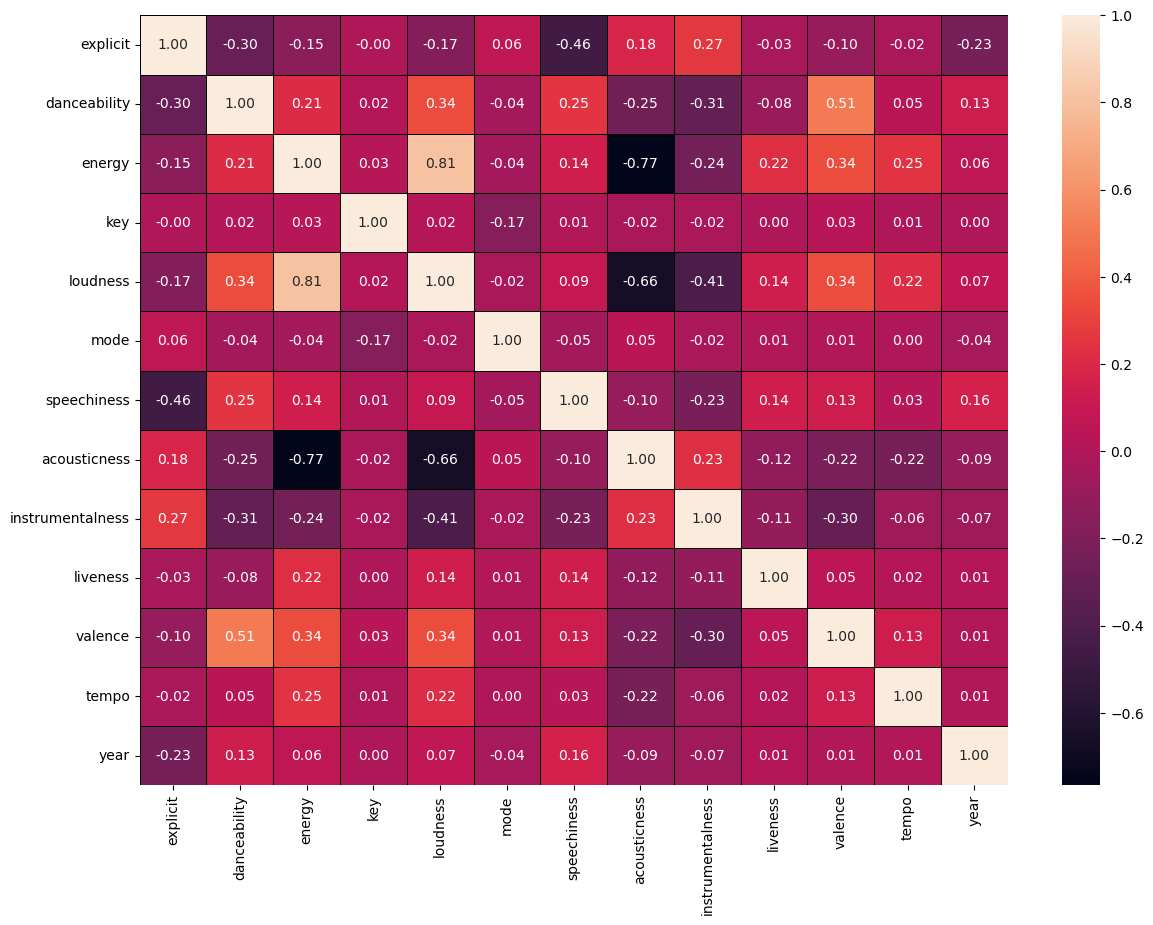

In [25]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5, linecolor='Black')
plt.show()

In [26]:
columnss = ['explicit','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

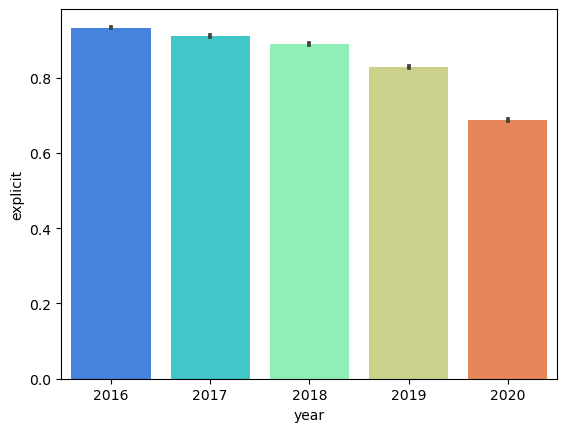

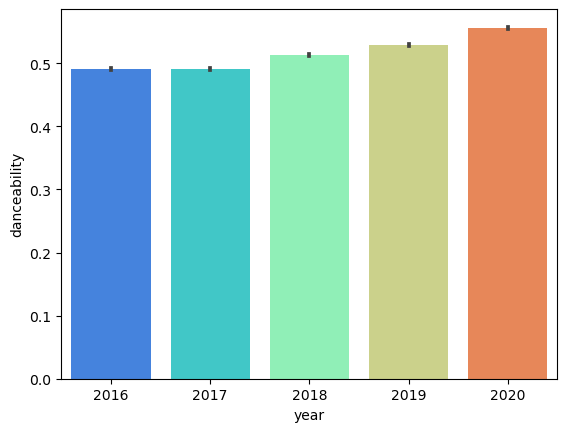

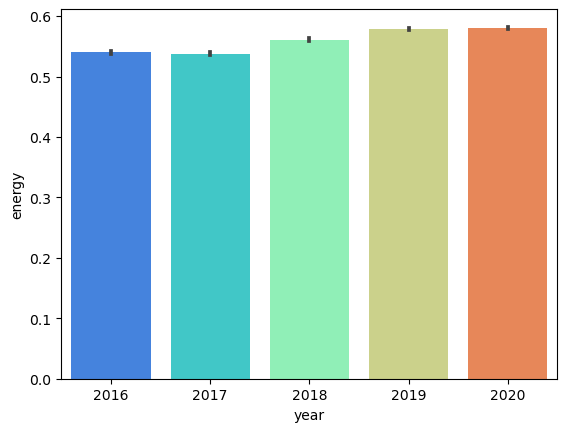

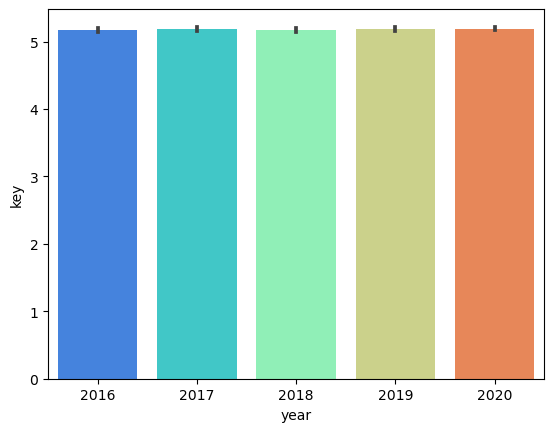

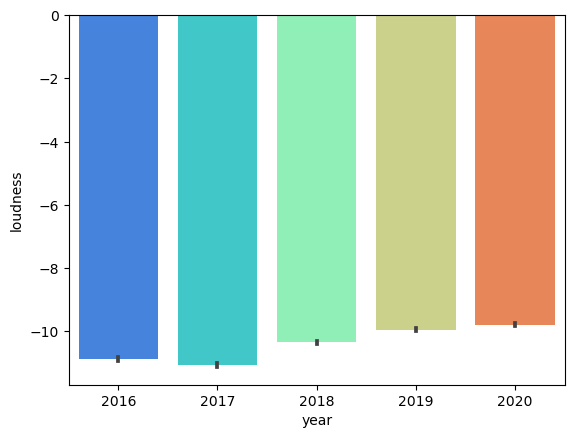

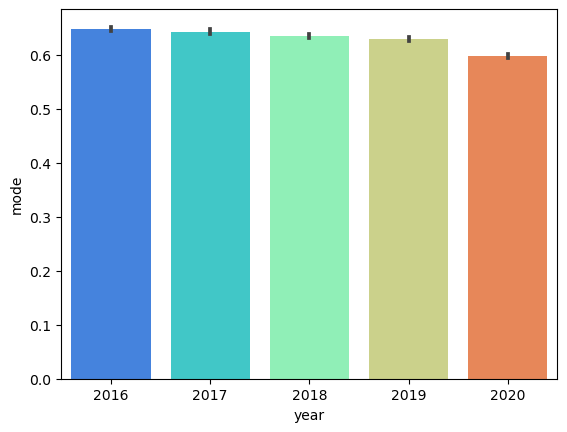

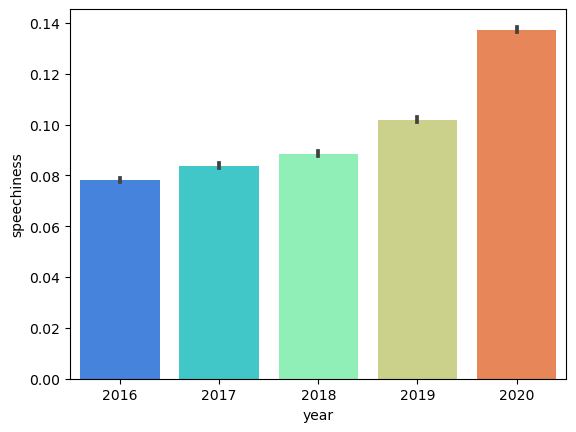

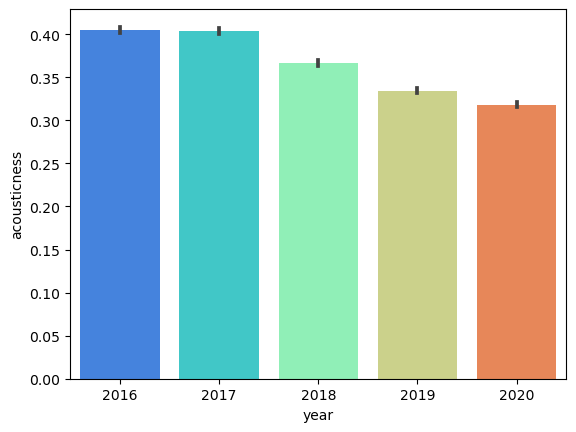

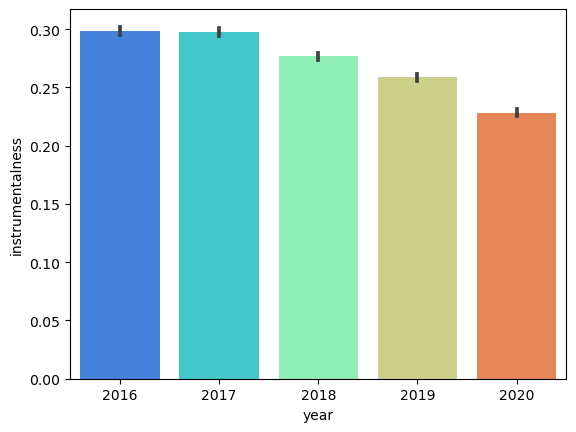

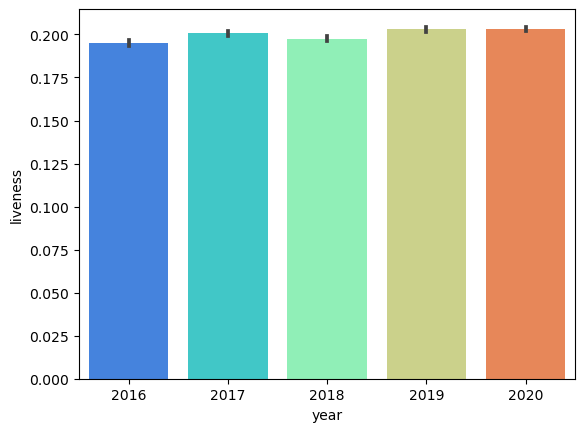

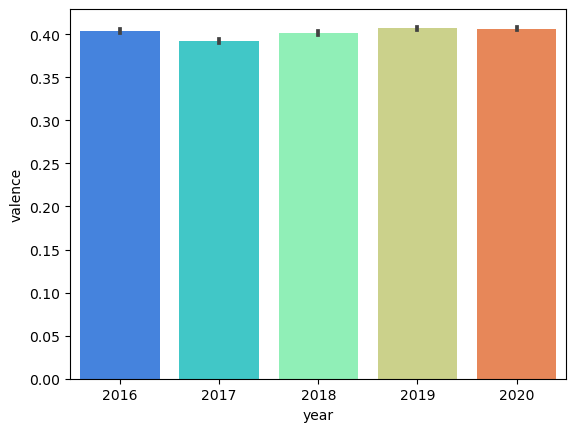

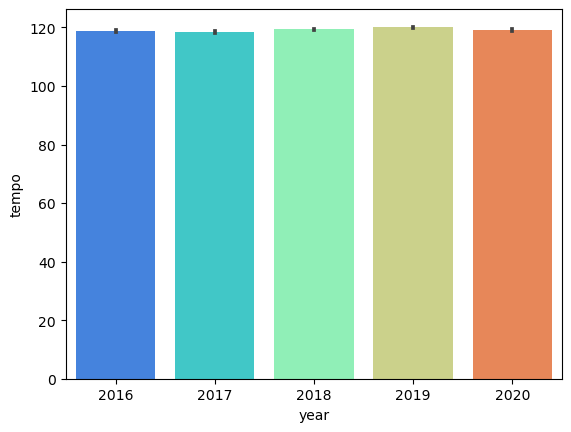

In [27]:
for col in columnss:
    sns.barplot(x='year', y=col, data=df, palette='rainbow')
    plt.show()

# Normalizing The Data

In [28]:
df.dtypes

id                   object
name                 object
album                object
artists              object
artist_ids           object
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
year                  int64
dtype: object

In [29]:
def normalize_col(col):
    max_c = df[col].max()
    min_c = df[col].min()
    df[col] = (df[col] - min_c)/(max_c - min_c)

In [30]:
columns = ['explicit','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [31]:
for col in columns:
    normalize_col(col)

# Recommendation System

In [32]:
df[df['artists'].str.contains('coldplay', case=False)]

,id,name,album,artists,artist_ids,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
623359,6U8VHaQxzECez4TSt0nmiP,Everglow - Live from Spotify London,Live from Spotify London,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.540323,0.486,0.090909,0.764911,0.0,0.038263,0.305221,0.000479,0.945946,0.1250,0.292154,2016
623360,6qt0IWS8y6yGR6gNTEmQzj,Viva La Vida - Live from Spotify London,Live from Spotify London,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.436492,0.922,0.727273,0.804707,1.0,0.124095,0.123494,0.000005,0.930931,0.5000,0.555179,2016
623361,2XiSB3m4WSkxD3xIUrYHfV,Adventure of a Lifetime - Live from Spotify Lo...,Live from Spotify London,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.519153,0.851,0.818182,0.783924,0.0,0.071251,0.064659,0.000139,0.919920,0.5880,0.464641,2016
623362,33koOQs551ijjVmLbmrcDc,Yellow - Live from Spotify London,Live from Spotify London,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.224798,0.439,1.000000,0.749406,1.0,0.032265,0.448795,0.014100,0.926927,0.1190,0.666438,2016
623363,4QVdnpSO5JGMFOEl6ys4RQ,Christmas Lights - Live from Spotify London,Live from Spotify London,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.297379,0.496,0.636364,0.764200,1.0,0.033816,0.207831,0.000396,0.858859,0.2240,0.530510,2016
657634,1dNIEtp7AY3oDAKCGg2XkH,Something Just Like This,Something Just Like This,"['The Chainsmokers', 'Coldplay']","['69GGBxA162lTqCwzJG5jLp', '4gzpq5DPGxSnKTe4SA...",1.0,0.611895,0.649,1.000000,0.806295,0.0,0.037435,0.030723,0.000025,0.174174,0.5050,0.413748,2017
661000,5LXj9Ch3O9ATm1NoHT8GXn,Hypnotised,Hypnotised,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.517137,0.683,0.454545,0.814010,1.0,0.033092,0.340361,0.739000,0.087187,0.1530,0.482280,2017
702693,6Tb7Zfo4PcSiS4TqQ4NnTh,Sunrise,Everyday Life,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.147177,0.216,0.818182,0.721484,1.0,0.041262,0.942771,0.540000,0.077377,0.0341,0.313517,2019
702694,1e8D1BCD2afT56Km7UahpB,Church,Everyday Life,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.452621,0.736,1.000000,0.801985,0.0,0.038056,0.008685,0.145000,0.147147,0.1330,0.498016,2019
702695,45PqOIkZ9PdCjsCJQYzx9G,Trouble In Town,Everyday Life,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],0.0,0.599798,0.315,0.181818,0.734280,0.0,0.030610,0.428715,0.648000,0.111111,0.3360,0.385717,2019


In [33]:
df.sample(3)

,id,name,album,artists,artist_ids,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
969892,1gOztGolzcwqeAHBms30aI,School Shooter,Interlude,['Poodieville'],['3MnUflaan7wbkg8w7wTXDw'],0.0,0.540323,0.660,0.818182,0.788371,0.0,0.483971,0.356426,0.000000,0.651652,0.310,0.302582,2020
1203911,5A99ANQtMQhNzvqoHVbY29,Omnipresencia,Ente,['Descarnado'],['54v7BpwM187QiAXvivhqqB'],1.0,0.337702,0.982,1.000000,0.796615,1.0,0.161324,0.002118,0.026800,0.289289,0.113,0.471964,2019
476731,5kbN52TOPwGk7ayazKNm6Q,Blackberry,Majestic Walrus,['Burnt'],['7bmhVj7FvJtbWjYVE9K9ab'],1.0,0.812500,0.703,0.636364,0.810773,1.0,0.039193,0.567269,0.000007,0.101101,0.955,0.513582,2017


In [49]:
 X= df[df['name'] == 'Viva La Vida - Live from Spotify London'].iloc[:1,6:17]

In [35]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
868917,0.171371,0.708,0.0,0.801727,0.0,0.043123,0.04006,0.00945,0.354354,0.251,0.360099


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276558 entries, 22 to 1204017
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                276558 non-null  object 
 1   name              276558 non-null  object 
 2   album             276558 non-null  object 
 3   artists           276558 non-null  object 
 4   artist_ids        276558 non-null  object 
 5   explicit          276558 non-null  float64
 6   danceability      276558 non-null  float64
 7   energy            276558 non-null  float64
 8   key               276558 non-null  float64
 9   loudness          276558 non-null  float64
 10  mode              276558 non-null  float64
 11  speechiness       276558 non-null  float64
 12  acousticness      276558 non-null  float64
 13  instrumentalness  276558 non-null  float64
 14  liveness          276558 non-null  float64
 15  valence           276558 non-null  float64
 16  tempo             

In [37]:
user = df.iloc[:,6:17]

In [38]:
user

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
22,0.793347,0.903,0.000000,0.833538,1.0,0.032575,0.293173,0.000025,0.101101,0.962,0.481839
23,0.591734,0.958,0.363636,0.829680,1.0,0.060600,0.107430,0.000000,0.057457,0.832,0.353411
24,0.569556,0.781,0.090909,0.830830,0.0,0.031851,0.023394,0.000010,0.081982,0.461,0.441792
25,0.656250,0.567,0.818182,0.810501,1.0,0.024819,0.564257,0.000006,0.186186,0.370,0.389782
26,0.839718,0.805,0.000000,0.838680,1.0,0.035884,0.076305,0.013600,0.073173,0.974,0.466039
...,...,...,...,...,...,...,...,...,...,...,...
1204013,0.686492,0.472,0.909091,0.783198,1.0,0.030817,0.633534,0.000000,0.100100,0.612,0.429785
1204014,0.455645,0.463,0.454545,0.794694,1.0,0.028438,0.440763,0.000000,0.141141,0.214,0.381041
1204015,0.401210,0.503,0.363636,0.805464,0.0,0.032161,0.767068,0.000000,0.095495,0.362,0.307343
1204016,0.420363,0.730,0.909091,0.816445,0.0,0.222337,0.374498,0.000000,0.059059,0.684,0.326480


In [50]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(user, X)
song_similarity_scores = cosine_sim.flatten()
sorted_song_indices = song_similarity_scores.argsort()[::-1]

In [51]:
top_n_recommendations = sorted_song_indices[1:5+1] 

In [52]:
top_n_recommendations

array([241853,  48142,  76098,  18742, 235676], dtype=int64)

In [53]:
indices_to_display = top_n_recommendations  
recommended_songs = df.iloc[indices_to_display]

for index, song in recommended_songs.iterrows():
    print(f"Song Name: {song['name']}")
    print(f"Artists: {song['artists']}")
    print(f"Year: {song['year']}")
    print("----------")

Song Name: Disparity
Artists: ['Cardinals Pride']
Year: 2016
----------
Song Name: No Cities to Love - Live
Artists: ['Sleater-Kinney']
Year: 2017
----------
Song Name: Attababy
Artists: ['The Hell Yeah Babies']
Year: 2018
----------
Song Name: Lebenszeit - Live
Artists: ['Puhdys']
Year: 2017
----------
Song Name: Dance on a Volcano - Live at Hammersmith, 2019
Artists: ['Steve Hackett']
Year: 2020
----------
